In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import PoissonRegressor

%cd C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj\

C:\Users\user\Desktop\KUL - Mstat\Modern Data Analytics\proj


In [2]:
# import data
mortality = pd.read_csv('mortality_merged.csv')

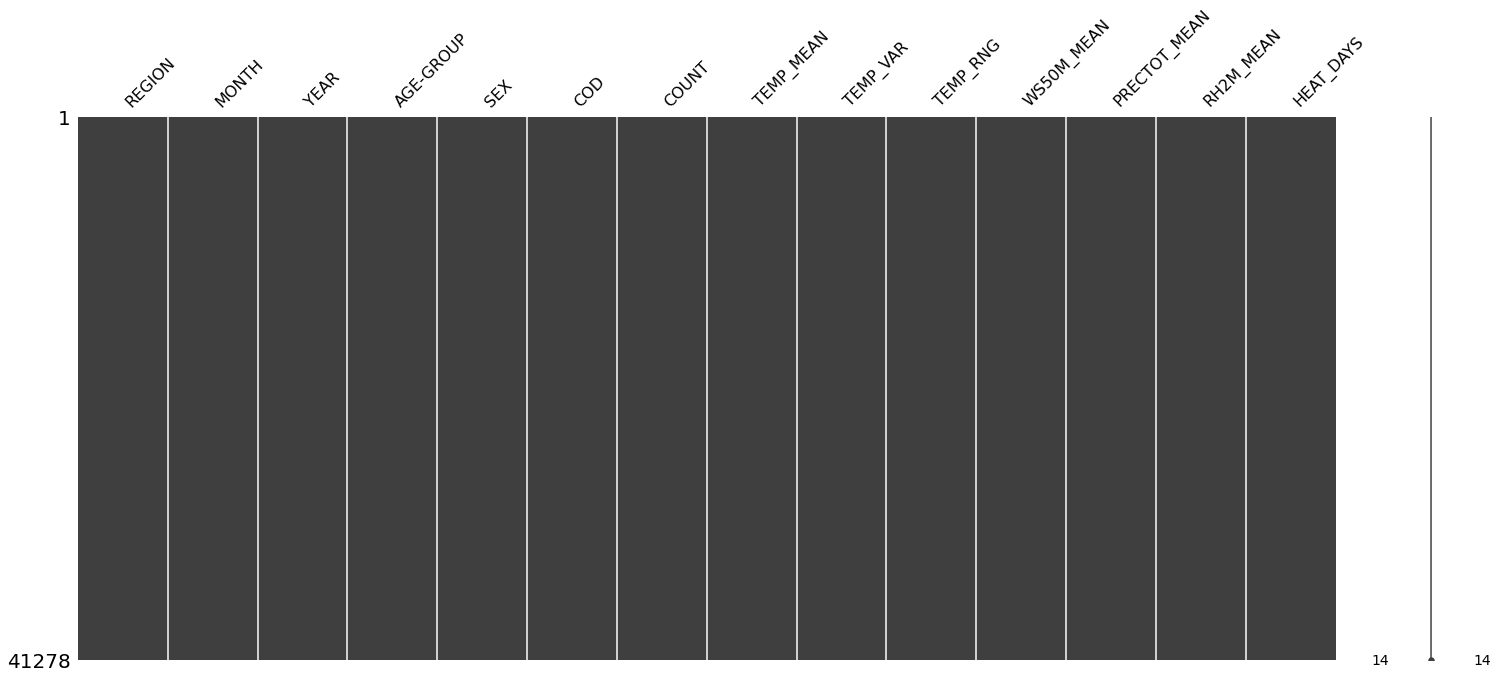

In [3]:
# Check for missing values, it seems alright
missingno.matrix(mortality)

In [4]:
# Summer period, comment it out if you want to do for the whole period
def get_summer(df):
    return df[(df['MONTH'] <= 8) & (df['MONTH'] >= 5)]
mortality = get_summer(mortality)

In [5]:
# Train-test split
TEST_SIZE = 0.1
SEED = 467051528
X_train, X_test, y_train, y_test = train_test_split(mortality.drop('COUNT', axis = 1), 
                                                    mortality['COUNT'], 
                                                    test_size = TEST_SIZE,
                                                    random_state = SEED,
                                                    shuffle = True)

In [6]:
# Preprocessing steps
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(drop = 'first')

categorical_features = ['REGION', 'AGE-GROUP', 'SEX', 'COD']
numeric_features = X_train.columns.to_list()[6:]

preprocessor = ColumnTransformer(
    transformers = [
        ('drop_columns', 'drop', ['YEAR', 'MONTH']),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [17]:
# Parameter grids
n = np.arange(1, 34)
alpha = np.arange(0, 2, 0.05)
params = {'preprocessing__num' : [StandardScaler(), RobustScaler()], 
         'dimension_reduction__n_components': n,
         'regressor__alpha': alpha}

In [18]:
# Model
model = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('dimension_reduction', TruncatedSVD()),
    ('regressor', PoissonRegressor())
])

In [19]:
# Grid search
search = RandomizedSearchCV(model, 
                            param_distributions = params, 
                            random_state = SEED)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('drop_columns',
                                                                               'drop',
                                                                               ['YEAR',
                                                                                'MONTH']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['TEMP_MEAN',
                                                                                'TEMP_VAR',
                                                                                'T

In [20]:
# Summary of grid search
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_preprocessing__num,param_dimension_reduction__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078831,0.008775,0.008805,0.005068,0.75,RobustScaler(),17,"{'regressor__alpha': 0.75, 'preprocessing__num...",0.372639,0.341250,0.352584,0.392659,0.346213,0.361069,0.019064,6
1,0.062791,0.002970,0.008039,0.003112,0.05,StandardScaler(),8,"{'regressor__alpha': 0.05, 'preprocessing__num...",0.049886,0.048322,0.044768,0.055010,0.052700,0.050137,0.003536,9
2,0.097032,0.004446,0.009666,0.000818,0.95,RobustScaler(),23,"{'regressor__alpha': 0.9500000000000001, 'prep...",0.600208,0.595470,0.572939,0.583748,0.601623,0.590797,0.010920,5
3,0.104291,0.004731,0.008455,0.003219,1.5,StandardScaler(),32,"{'regressor__alpha': 1.5, 'preprocessing__num'...",0.658484,0.648255,0.639936,0.643761,0.656962,0.649480,0.007244,3
4,0.105473,0.004330,0.005232,0.004338,0.25,StandardScaler(),25,"{'regressor__alpha': 0.25, 'preprocessing__num...",0.794875,0.717567,0.709118,0.744001,0.785384,0.750189,0.034713,1
5,0.051889,0.005751,0.006827,0.003507,0.5,StandardScaler(),5,"{'regressor__alpha': 0.5, 'preprocessing__num'...",-0.004753,0.008284,0.004235,0.009226,0.004739,0.004346,0.004945,10
6,0.062877,0.003879,0.007246,0.003734,1.3,RobustScaler(),10,"{'regressor__alpha': 1.3, 'preprocessing__num'...",0.118650,0.124774,0.117497,0.117591,0.121947,0.120092,0.002844,8
7,0.070921,0.005736,0.006465,0.004499,0.3,StandardScaler(),14,"{'regressor__alpha': 0.30000000000000004, 'pre...",0.154263,0.162255,0.143786,0.154256,0.151700,0.153252,0.005918,7
8,0.114801,0.004353,0.006445,0.003672,0.7,StandardScaler(),32,"{'regressor__alpha': 0.7000000000000001, 'prep...",0.750423,0.742710,0.728938,0.739279,0.750707,0.742411,0.008055,2
9,0.102712,0.004084,0.010065,0.000024,1.6,RobustScaler(),26,"{'regressor__alpha': 1.6, 'preprocessing__num'...",0.641269,0.632032,0.624073,0.626990,0.640134,0.632900,0.006870,4


In [21]:
# Best fitted scores
print(search.best_params_)
print('Best scores: ', search.best_score_)

{'regressor__alpha': 0.25, 'preprocessing__num': StandardScaler(), 'dimension_reduction__n_components': 25}
Best scores:  0.750188873556238


In [22]:
# Test performance
model_chosen = search.best_estimator_
y_pred = model_chosen.predict(X_test)

In [23]:
# Test loss
mean_squared_error(y_pred, y_test)

699.3312983918347

In [24]:
# Training loss
mean_squared_error(y_train, model_chosen.predict(X_train))

610.8837572638542

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


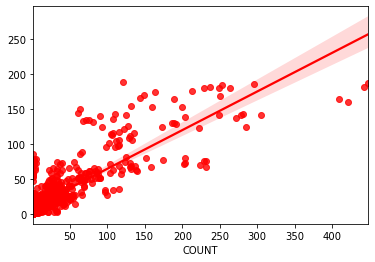

In [25]:
# Test data: y_test, y_pred
sns.regplot(y_test, y_pred, color = 'red')

In [27]:
# R-squared between y_pred and y_test
np.corrcoef(y_test, y_pred)

array([[1.       , 0.8451857],
       [0.8451857, 1.       ]])

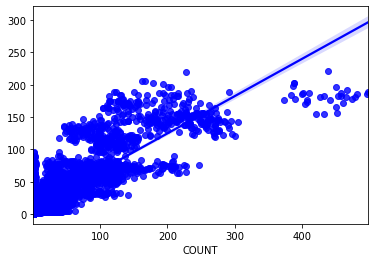

In [28]:
# Training data: y_test, y_pred_train
y_pred_train = model_chosen.predict(X_train)
sns.regplot(x = y_train, y = y_pred_train, color = 'blue')

In [30]:
# R-squared between y_pred and y_pred_train
np.corrcoef(y_train, y_pred_train)

array([[1.        , 0.84385902],
       [0.84385902, 1.        ]])